In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [52]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 14410

beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 10e-6,
    'sigma_y': 10e-6,
    'z0x': 70,
    'z0y': 70,
    'rangeFactor': 5,
    'scaleFactor': 5,
    'z_source': 920
}

In [73]:
b1 = beam.Beam(beam_params=beam_params)

# mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
# mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

alphaAsym = 78.5*np.pi/180

slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)

crystal1 = optics.Crystal('c1', hkl=[11,5,3], length=3e-2, width=25e-3, z=990, E0=E0,
                          alphaAsym=-alphaAsym, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.1, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.4, E0=E0,alphaAsym=alphaAsym, orientation=0,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.5, E0=E0,alphaAsym=alphaAsym, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)
slit2 = optics.Slit('slit', z=crystal4.z+1, x_width=20e-6, y_width=500e-6)

# crl1 = optics.CRL('crlx', z=990.5, roc=7e-6)
# crl2 = optics.CRL('crly', z=990.5,orientation=1, roc=7e-6)
# slit = optics.Slit('slit', z=990.6, x_width=30e-6, y_width=100e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

# IP = optics.PPM('IP', FOV=50e-6, z=991.43, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=slit.z + .05, N=256)

YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 6.5, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)


devices = [slit, slit2,upstream_YAG, downstream_YAG, YAG_mid, crystal1,crystal2,crystal3,crystal4]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal1.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 226.55709847605357 microns
FWHM in y: 226.55709847605357 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650835277593639
3.650835277593639
b 0.10
b 0.10
b 9.84
b 9.84
10.364866806298679
158.97993288681337
2.0895343548588126
after c1: -2.81
after c2: 0.00
after c3: 2.81
after c4: 0.00
(array([8.11070763e-07, 0.00000000e+00, 3.11836871e-07]), array([ 0.35886577,  0.        , -0.93338918]))
3.452485144369975e-06


In [74]:
print(issubclass(type(crystal1), optics.Mirror))

True


In [75]:
crystal1 = optics.Crystal('c1', hkl=[11,5,3], length=3e-2, width=25e-3, z=990, E0=14410,
                          alphaAsym=78.4*np.pi/180, orientation=2,pol='p')
print(np.sin(crystal1.beta0)/np.sin(crystal1.alpha))
print(crystal2.beta0*180/np.pi)
print(crystal3.beta0*180/np.pi)
print(crystal4.beta0*180/np.pi)

b 9.45
0.10578710568978457
158.96949411224142
2.0895343548588126
2.0895343548588126


slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.91
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 824926.89
zx: 7531.84
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809193.70
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 879765.94
zx: 809194.68
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809194.68
zy: 72.01
azimuth -0.00 mrad
drift5
delta z: 880249.79
zx: 809195.76
zy: 73.09
azimuth -0.00 mrad
c3
zx: 8369.38
zy: 73.09
azimuth 2811.21 mrad
drift6
delta z: 820459.12
zx: 8370.30
zy: 74.02
azimuth 2811.21 mrad
c4
zx: 87.37
zy: 74.02
azimuth -0.18 mrad
drift7
delta z: 95838.24
zx: 88.47
zy: 75.11
azimuth -0.18 mrad
slit
zx: 88.47
zy: 75.11
azimuth -0.18 mrad
drift8
delta z: 0.09
zx: 93.97
zy: 80.61
azimuth -0.18 mrad
YAG2
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data cont

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2919: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2920: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2927: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2933: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2955: RuntimeWarning: invalid value encountered in greater
  mask = line_x > .1
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2969

<IPython.core.display.Javascript object>


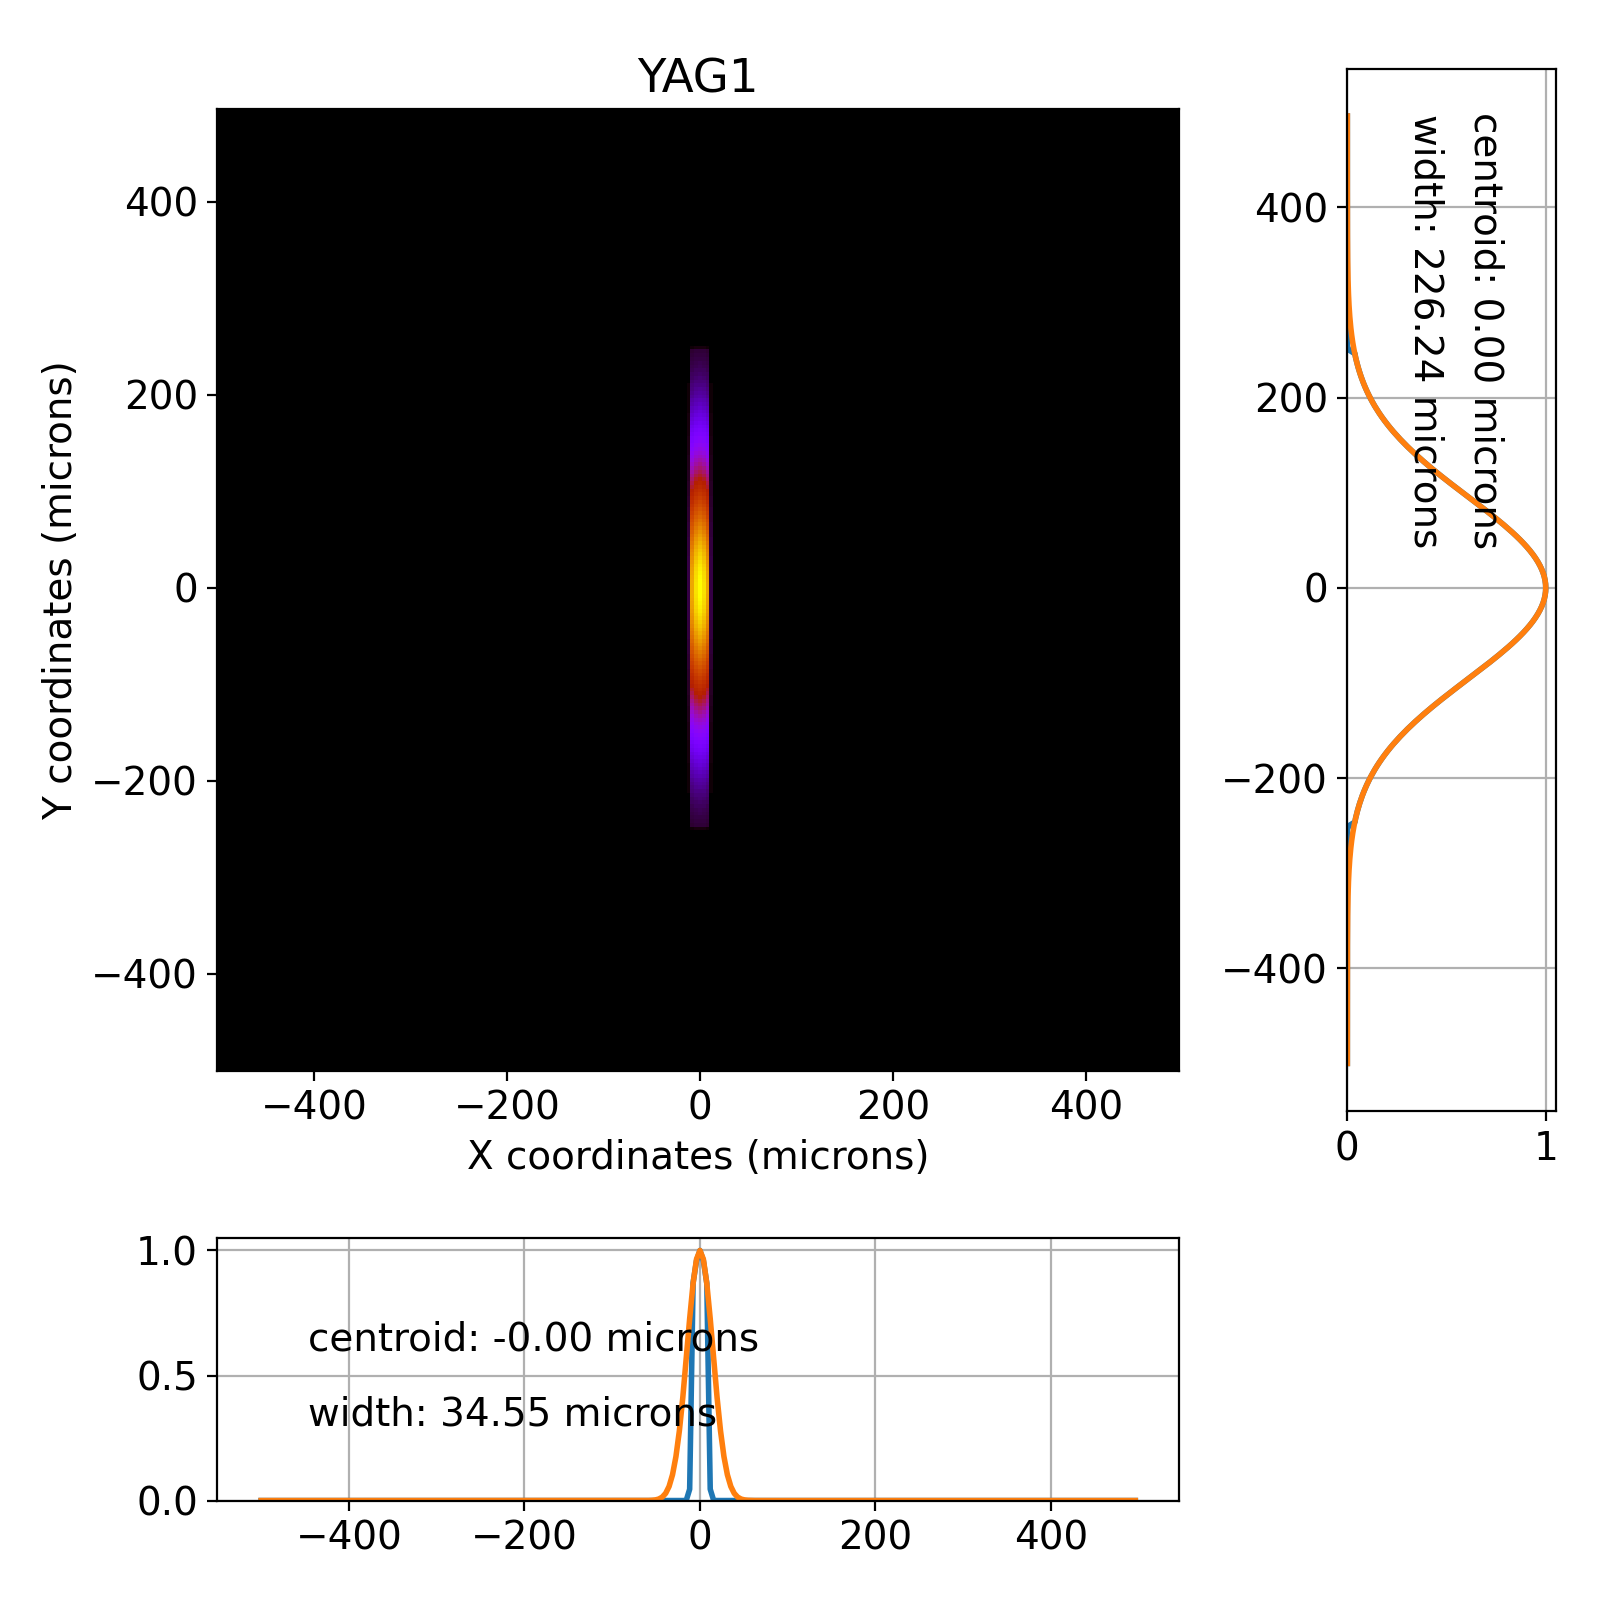

<IPython.core.display.Javascript object>


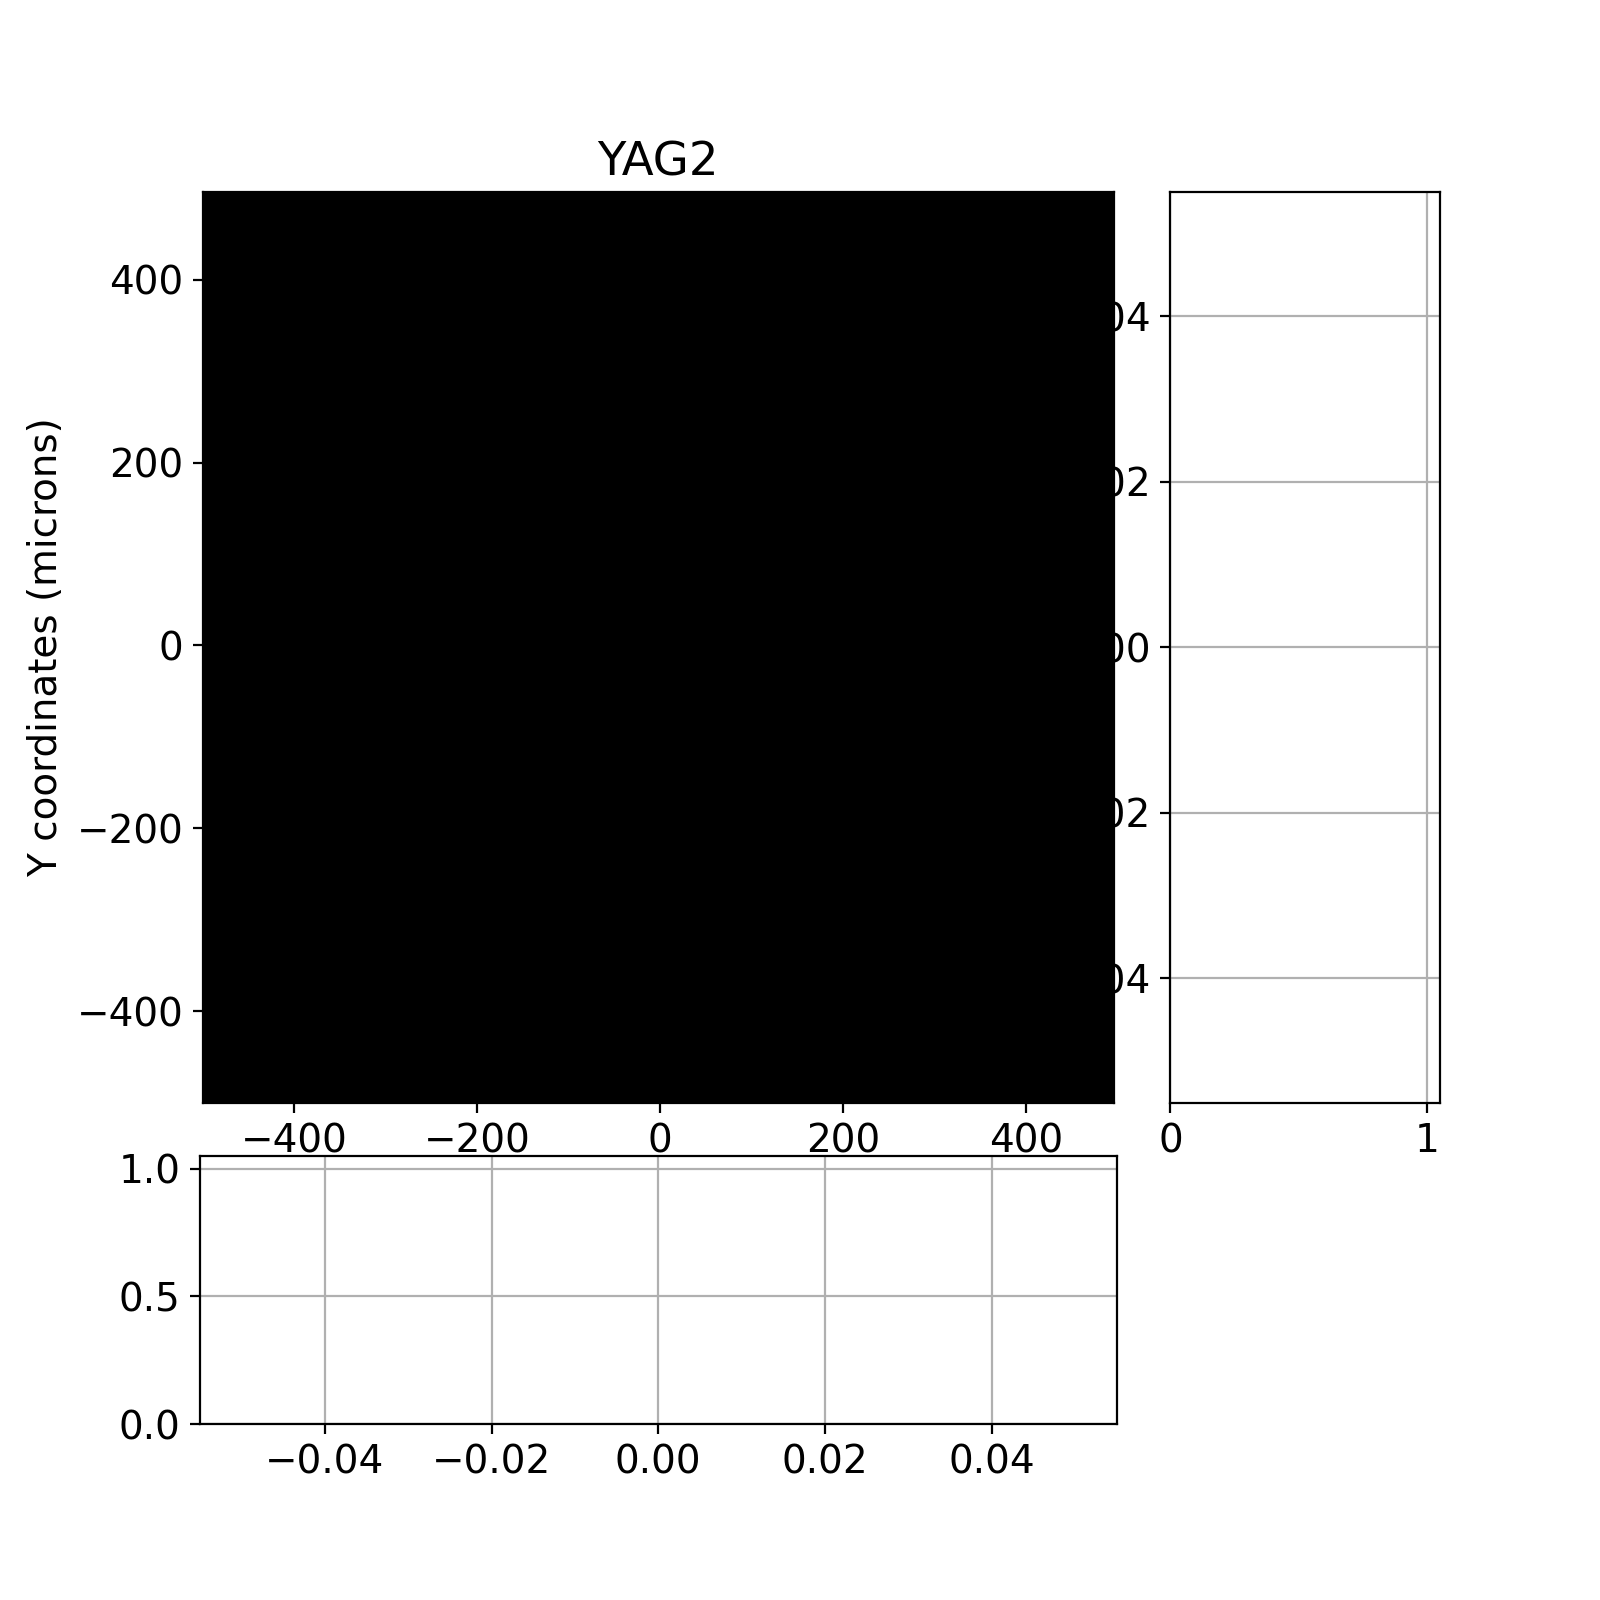

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3121: RuntimeWarning: invalid value encountered in true_divide
  ax_y.plot(self.y_lineout/np.max(self.y_lineout), self.y * 1e6)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3130: RuntimeWarning: invalid value encountered in true_divide
  ax_x.plot(self.x * 1e6, self.x_lineout/np.max(self.x_lineout))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3145: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<IPython.core.display.Javascript object>


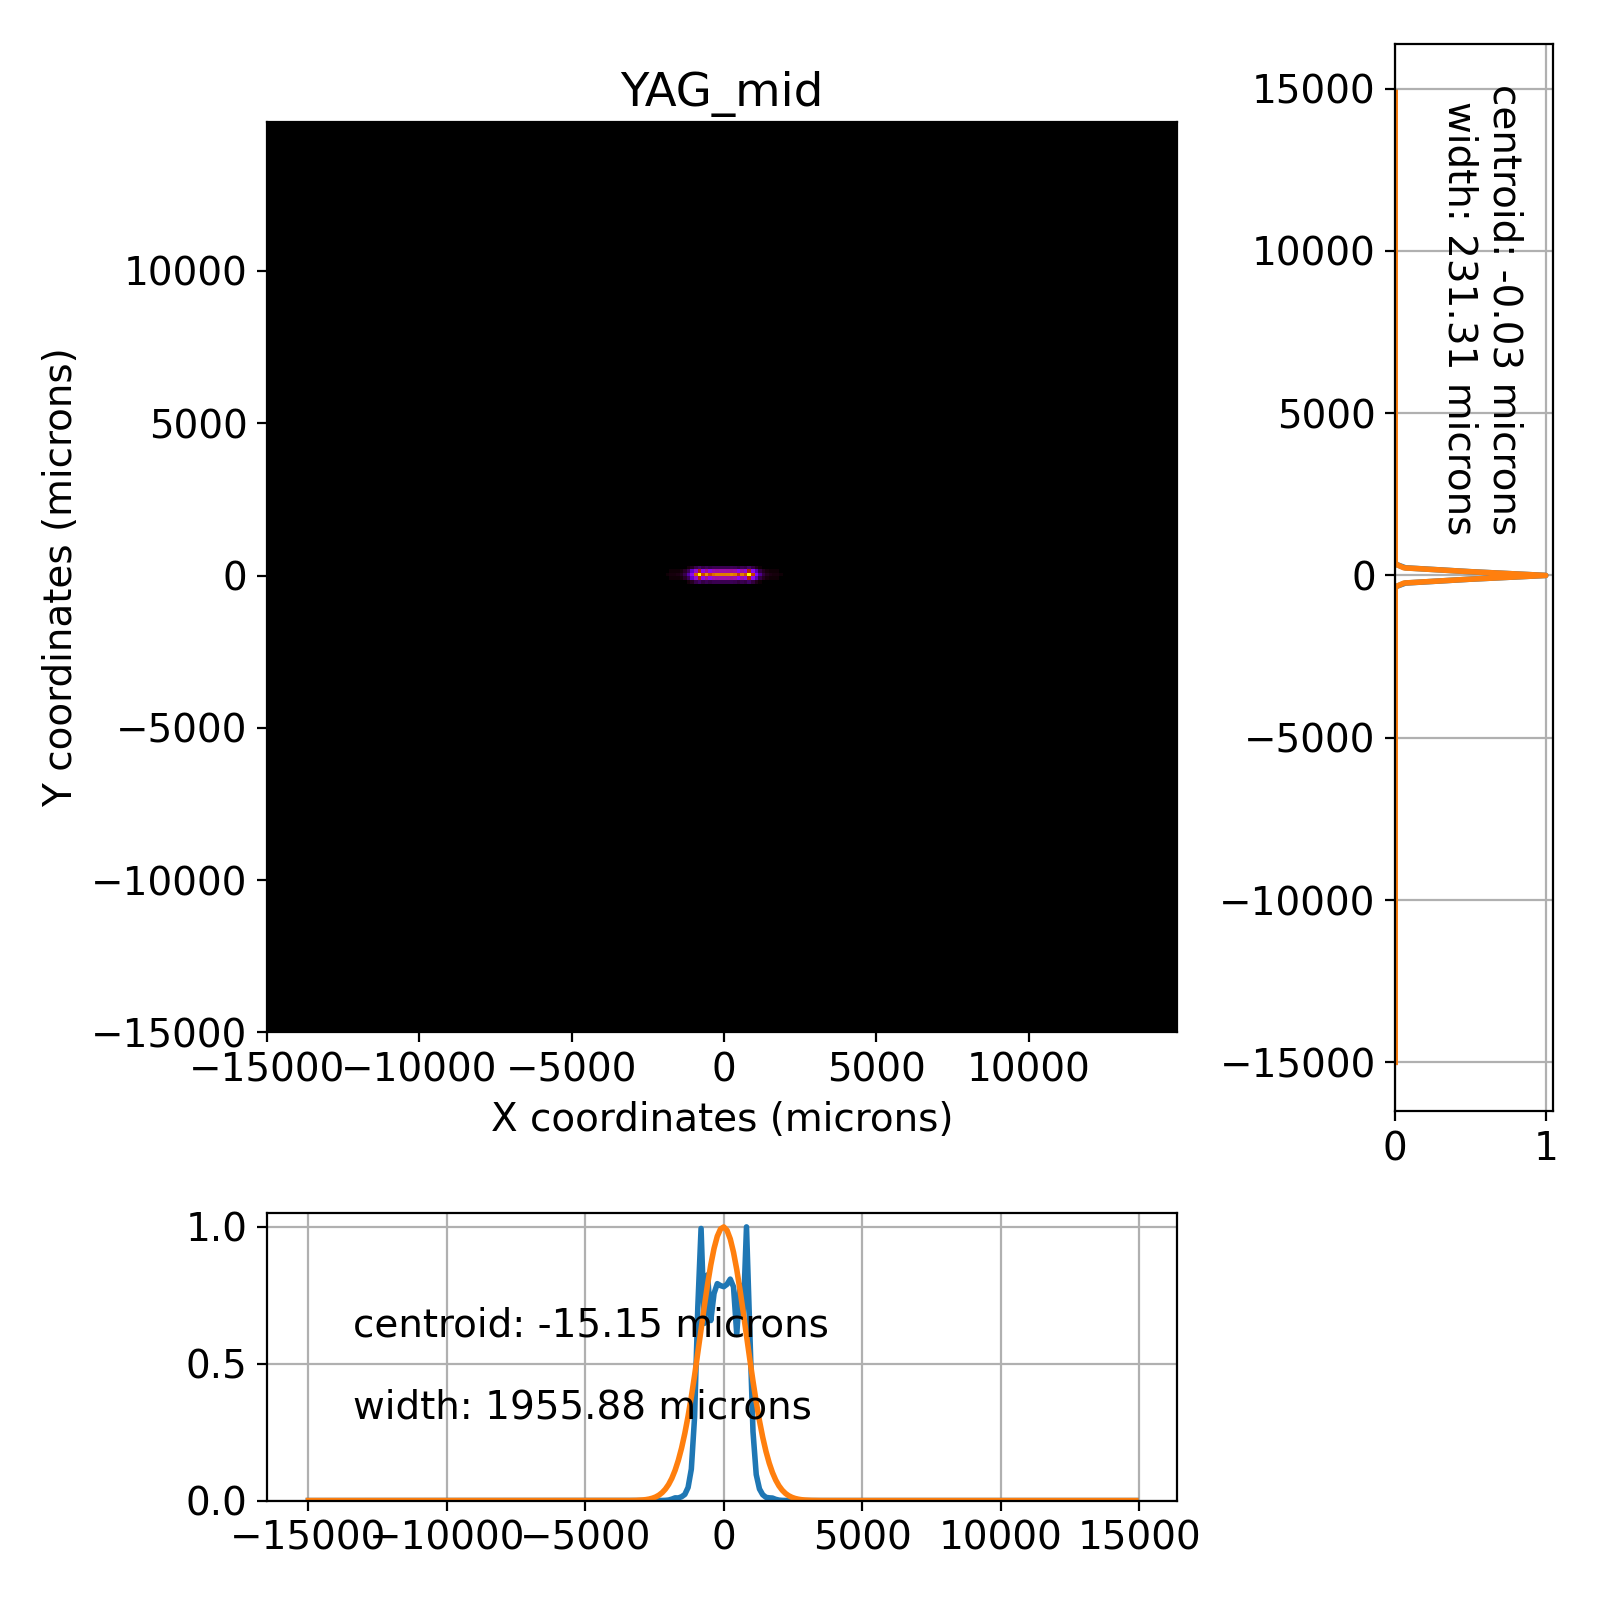

<IPython.core.display.Javascript object>


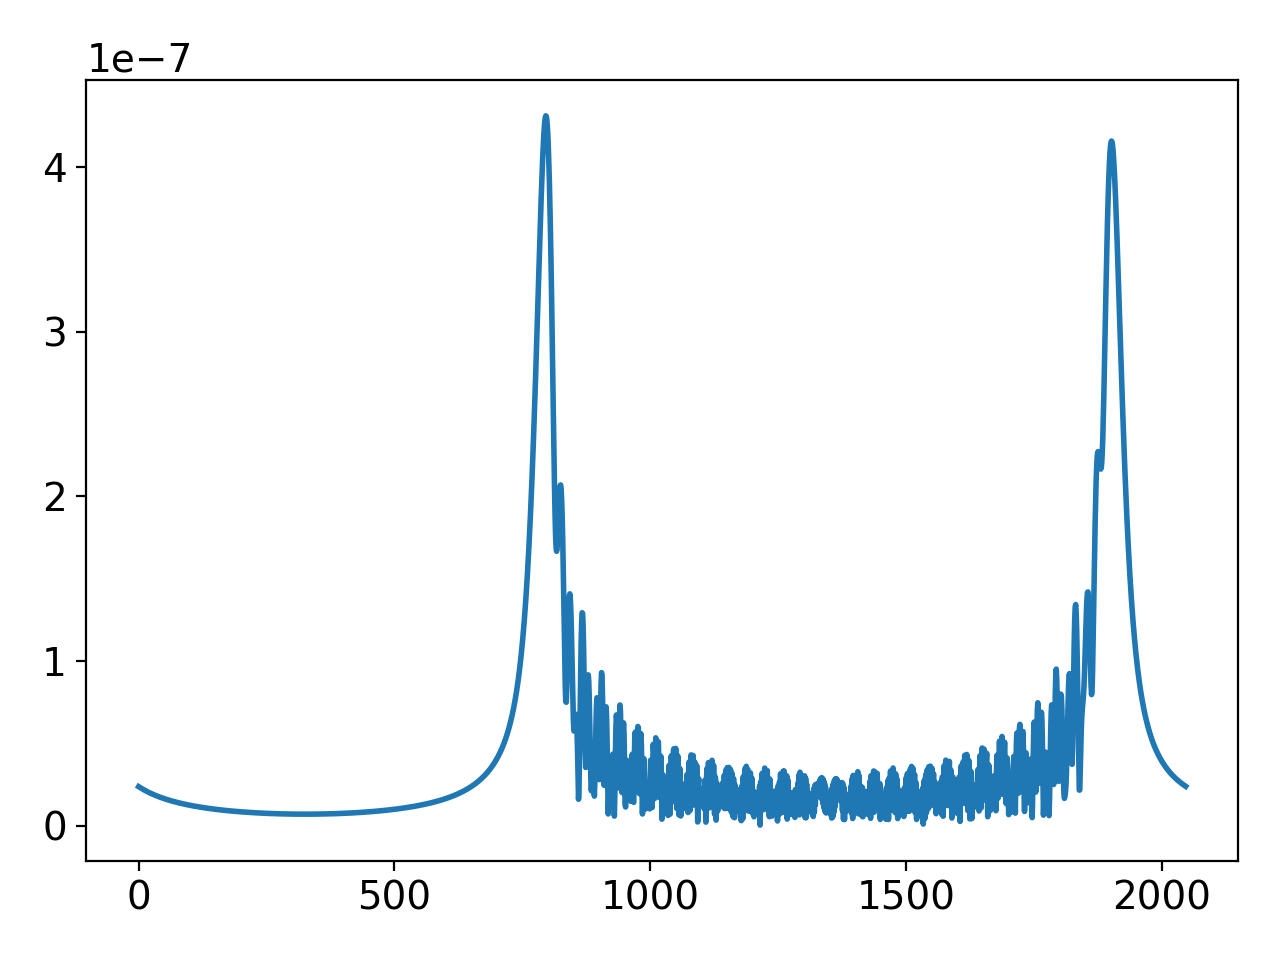

In [76]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.YAG2.view_beam()
XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [77]:
beam_params['photonEnergy'] = 14410

pulse_test = beam.Pulse(beam_params=beam_params, tau=2000, time_window=160000)

In [78]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1', 'YAG2','YAG_mid'])

FWHM in x: 226.5571713833326 microns
FWHM in y: 226.5571713833326 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834099540057
3.650834099540057
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.84
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: -46.69
zx: 7531.77
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809097.18
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: -43.60
zx: 809098.16
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809098.16
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: -53.84
zx: 809099.24
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8351.87
zy: 73.09
azimuth 2811.17 mrad
drift6
delta z: -149.52
zx: 8352.79
zy: 74.02
azimuth 2811.17 mrad
c4
zx: 85.42
zy: 74.02
azimuth 0.19 mrad
drift7
delta z: -98.36
zx: 86.52
zy: 75.11
azimuth 0.19 mrad
slit
zx: 86.52
zy: 75.11
azimuth 0.19 mrad
drift8
delta z: 0.00
zx: 92.0

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2919: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2920: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2927: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2933: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2955: RuntimeWarning: invalid value encountered in greater
  mask = line_x > .1
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2969

FWHM in x: 226.55717097374097 microns
FWHM in y: 226.55717097374097 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834106158336
3.650834106158336
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.84
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.77
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809097.73
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809098.71
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809098.71
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: 0.30
zx: 809099.79
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8351.96
zy: 73.09
azimuth 2811.17 mrad
drift6
delta z: 0.84
zx: 8352.89
zy: 74.02
azimuth 2811.17 mrad
c4
zx: 85.43
zy: 74.02
azimuth 0.18 mrad
drift7
delta z: 0.55
zx: 86.53
zy: 75.11
azimuth 0.18 mrad
slit
zx: 86.53
zy: 75.11
azimuth 0.18 mrad
drift8
delta z: -0.00
zx: 92.03
zy: 80

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/util.py:101: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-((x - x0) ** 2 / (2 * w ** 2)))


zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.84
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.78
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809101.52
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809102.49
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809102.49
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: 0.30
zx: 809103.58
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8352.65
zy: 73.09
azimuth 2811.18 mrad
drift6
delta z: 0.84
zx: 8353.58
zy: 74.02
azimuth 2811.18 mrad
c4
zx: 85.51
zy: 74.02
azimuth 0.17 mrad
drift7
delta z: 0.55
zx: 86.61
zy: 75.11
azimuth 0.17 mrad
slit
zx: 86.61
zy: 75.11
azimuth 0.17 mrad
drift8
delta z: -0.00
zx: 92.11
zy: 80.61
azimuth 0.17 mrad
YAG2
zx: 92.11
zy: 80.61
azimuth 0.17 mrad
FWHM in x: 226.55716769700828 microns
FWHM in y: 226.55716769700828 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508341591045643
3.65083415910456

zx: 86.69
zy: 75.11
azimuth 0.15 mrad
slit
zx: 86.69
zy: 75.11
azimuth 0.15 mrad
drift8
delta z: -0.00
zx: 92.19
zy: 80.61
azimuth 0.15 mrad
YAG2
zx: 92.19
zy: 80.61
azimuth 0.15 mrad
FWHM in x: 226.5571644202757 microns
FWHM in y: 226.5571644202757 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834212050793
3.650834212050793
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.85
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.78
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809106.40
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809107.38
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809107.38
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: 0.30
zx: 809108.46
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8353.54
zy: 73.09
azimuth 2811.18 mrad
drift6
delta z: 0.84
zx: 8354.46
zy: 74.02
azimuth 2811.18 mrad

FWHM in x: 226.55716114354334 microns
FWHM in y: 226.55716114354334 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834264997021
3.650834264997021
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.85
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.78
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809110.73
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809111.71
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809111.71
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: 0.30
zx: 809112.79
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8354.32
zy: 73.09
azimuth 2811.18 mrad
drift6
delta z: 0.84
zx: 8355.25
zy: 74.02
azimuth 2811.18 mrad
c4
zx: 85.70
zy: 74.02
azimuth 0.13 mrad
drift7
delta z: 0.55
zx: 86.79
zy: 75.11
azimuth 0.13 mrad
slit
zx: 86.79
zy: 75.11
azimuth 0.13 mrad
drift8
delta z: -0.00
zx: 92.29
zy: 80

zx: 809116.05
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809116.05
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: 0.30
zx: 809117.13
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8355.11
zy: 73.09
azimuth 2811.18 mrad
drift6
delta z: 0.84
zx: 8356.04
zy: 74.02
azimuth 2811.18 mrad
c4
zx: 85.78
zy: 74.02
azimuth 0.12 mrad
drift7
delta z: 0.55
zx: 86.88
zy: 75.11
azimuth 0.12 mrad
slit
zx: 86.88
zy: 75.11
azimuth 0.12 mrad
drift8
delta z: -0.00
zx: 92.38
zy: 80.61
azimuth 0.12 mrad
YAG2
zx: 92.38
zy: 80.61
azimuth 0.12 mrad
FWHM in x: 226.55715745721946 microns
FWHM in y: 226.55715745721946 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834324561528
3.650834324561528
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.85
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.79
zy: 71.03
azimuth -2809.17 mrad
c

zx: 7531.79
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809119.41
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809120.38
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809120.38
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: 0.30
zx: 809121.47
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8355.90
zy: 73.09
azimuth 2811.18 mrad
drift6
delta z: 0.84
zx: 8356.82
zy: 74.02
azimuth 2811.18 mrad
c4
zx: 85.87
zy: 74.02
azimuth 0.10 mrad
drift7
delta z: 0.55
zx: 86.97
zy: 75.11
azimuth 0.10 mrad
slit
zx: 86.97
zy: 75.11
azimuth 0.10 mrad
drift8
delta z: -0.00
zx: 92.47
zy: 80.61
azimuth 0.10 mrad
YAG2
zx: 92.47
zy: 80.61
azimuth 0.10 mrad
FWHM in x: 226.55715418048715 microns
FWHM in y: 226.55715418048715 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508343775077567
3.6508343775077567
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c

zx: 7531.79
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809124.29
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809125.27
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809125.27
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: 0.30
zx: 809126.35
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8356.78
zy: 73.09
azimuth 2811.18 mrad
drift6
delta z: 0.84
zx: 8357.71
zy: 74.02
azimuth 2811.18 mrad
c4
zx: 85.97
zy: 74.02
azimuth 0.08 mrad
drift7
delta z: 0.55
zx: 87.07
zy: 75.11
azimuth 0.08 mrad
slit
zx: 87.07
zy: 75.11
azimuth 0.08 mrad
drift8
delta z: -0.00
zx: 92.57
zy: 80.61
azimuth 0.08 mrad
YAG2
zx: 92.57
zy: 80.61
azimuth 0.08 mrad
FWHM in x: 226.55715049416355 microns
FWHM in y: 226.55715049416355 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508344370722634
3.6508344370722634
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c

FWHM in x: 226.5571472174315 microns
FWHM in y: 226.5571472174315 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508344900184917
3.6508344900184917
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.86
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.79
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809129.17
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809130.15
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809130.15
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: 0.30
zx: 809131.23
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8357.67
zy: 73.09
azimuth 2811.19 mrad
drift6
delta z: 0.84
zx: 8358.60
zy: 74.02
azimuth 2811.19 mrad
c4
zx: 86.07
zy: 74.02
azimuth 0.06 mrad
drift7
delta z: 0.55
zx: 87.16
zy: 75.11
azimuth 0.06 mrad
slit
zx: 87.16
zy: 75.11
azimuth 0.06 mrad
drift8
delta z: -0.00
zx: 92.66
zy: 80

zx: 87.27
zy: 75.11
azimuth 0.04 mrad
slit
zx: 87.27
zy: 75.11
azimuth 0.04 mrad
drift8
delta z: -0.00
zx: 92.77
zy: 80.61
azimuth 0.04 mrad
YAG2
zx: 92.77
zy: 80.61
azimuth 0.04 mrad
FWHM in x: 226.55714271192514 microns
FWHM in y: 226.55714271192514 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508345628195555
3.6508345628195555
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.87
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.80
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809135.13
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809136.11
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809136.11
zy: 72.01
azimuth 0.00 mrad
drift5
delta z: 0.30
zx: 809137.19
zy: 73.09
azimuth 0.00 mrad
c3
zx: 8358.75
zy: 73.09
azimuth 2811.19 mrad
drift6
delta z: 0.84
zx: 8359.68
zy: 74.02
azimuth 2811.19 

zx: 8359.54
zy: 73.09
azimuth 2811.19 mrad
drift6
delta z: 0.84
zx: 8360.46
zy: 74.02
azimuth 2811.19 mrad
c4
zx: 86.28
zy: 74.02
azimuth 0.02 mrad
drift7
delta z: 0.55
zx: 87.37
zy: 75.11
azimuth 0.02 mrad
slit
zx: 87.37
zy: 75.11
azimuth 0.02 mrad
drift8
delta z: -0.00
zx: 92.87
zy: 80.61
azimuth 0.02 mrad
YAG2
zx: 92.87
zy: 80.61
azimuth 0.02 mrad
FWHM in x: 226.5571390256018 microns
FWHM in y: 226.5571390256018 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508346223840626
3.6508346223840626
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.87
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.80
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809140.01
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809140.99
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809140.99
zy: 72.01
azimuth 0.00 mrad
d

zx: 8360.42
zy: 73.09
azimuth 2811.19 mrad
drift6
delta z: 0.84
zx: 8361.35
zy: 74.02
azimuth 2811.19 mrad
c4
zx: 86.37
zy: 74.02
azimuth 0.00 mrad
drift7
delta z: 0.55
zx: 87.47
zy: 75.11
azimuth 0.00 mrad
slit
zx: 87.47
zy: 75.11
azimuth 0.00 mrad
drift8
delta z: -0.00
zx: 92.97
zy: 80.61
azimuth 0.00 mrad
YAG2
zx: 92.97
zy: 80.61
azimuth 0.00 mrad
FWHM in x: 226.5571353392786 microns
FWHM in y: 226.5571353392786 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508346819485697
3.6508346819485697
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.88
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.81
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809144.89
zy: 71.03
azimuth 0.00 mrad
drift4
delta z: 0.24
zx: 809145.87
zy: 72.01
azimuth 0.00 mrad
YAG_mid
zx: 809145.87
zy: 72.01
azimuth 0.00 mrad
d

FWHM in x: 226.5571308337727 microns
FWHM in y: 226.5571308337727 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508347547496336
3.6508347547496336
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.88
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.81
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809150.86
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 0.24
zx: 809151.84
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809151.84
zy: 72.01
azimuth -0.00 mrad
drift5
delta z: 0.30
zx: 809152.92
zy: 73.09
azimuth -0.00 mrad
c3
zx: 8361.60
zy: 73.09
azimuth 2811.19 mrad
drift6
delta z: 0.84
zx: 8362.53
zy: 74.02
azimuth 2811.19 mrad
c4
zx: 86.51
zy: 74.02
azimuth -0.02 mrad
drift7
delta z: 0.55
zx: 87.60
zy: 75.11
azimuth -0.02 mrad
slit
zx: 87.60
zy: 75.11
azimuth -0.02 mrad
drift8
delta z: 0.00
zx: 93.10


zx: 8363.32
zy: 74.02
azimuth 2811.20 mrad
c4
zx: 86.59
zy: 74.02
azimuth -0.04 mrad
drift7
delta z: 0.55
zx: 87.69
zy: 75.11
azimuth -0.04 mrad
slit
zx: 87.69
zy: 75.11
azimuth -0.04 mrad
drift8
delta z: 0.00
zx: 93.19
zy: 80.61
azimuth -0.04 mrad
YAG2
zx: 93.19
zy: 80.61
azimuth -0.04 mrad
FWHM in x: 226.55712714744973 microns
FWHM in y: 226.55712714744973 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834814314141
3.650834814314141
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.88
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.81
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809155.74
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 0.24
zx: 809156.72
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809156.72
zy: 72.01
azimuth -0.00 mrad
drift5
delta z: 0.30
zx: 809157.80
zy: 73.09
azimuth -0.00

zx: 8363.28
zy: 73.09
azimuth 2811.20 mrad
drift6
delta z: 0.84
zx: 8364.20
zy: 74.02
azimuth 2811.20 mrad
c4
zx: 86.69
zy: 74.02
azimuth -0.06 mrad
drift7
delta z: 0.55
zx: 87.79
zy: 75.11
azimuth -0.06 mrad
slit
zx: 87.79
zy: 75.11
azimuth -0.06 mrad
drift8
delta z: 0.00
zx: 93.29
zy: 80.61
azimuth -0.06 mrad
YAG2
zx: 93.29
zy: 80.61
azimuth -0.06 mrad
FWHM in x: 226.557123461127 microns
FWHM in y: 226.557123461127 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508348738786482
3.6508348738786482
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.89
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.82
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809160.62
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 0.24
zx: 809161.60
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809161.60
zy: 72.01
azimuth -0.00 m

zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.89
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.82
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809164.96
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 0.24
zx: 809165.94
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809165.94
zy: 72.01
azimuth -0.00 mrad
drift5
delta z: 0.30
zx: 809167.02
zy: 73.09
azimuth -0.00 mrad
c3
zx: 8364.16
zy: 73.09
azimuth 2811.20 mrad
drift6
delta z: 0.84
zx: 8365.09
zy: 74.02
azimuth 2811.20 mrad
c4
zx: 86.79
zy: 74.02
azimuth -0.07 mrad
drift7
delta z: 0.55
zx: 87.89
zy: 75.11
azimuth -0.07 mrad
slit
zx: 87.89
zy: 75.11
azimuth -0.07 mrad
drift8
delta z: 0.00
zx: 93.39
zy: 80.61
azimuth -0.07 mrad
YAG2
zx: 93.39
zy: 80.61
azimuth -0.07 mrad
FWHM in x: 226.55711977480436 microns
FWHM in y: 226.55711977480436 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834933443155
3.650834933443155
slit
zx: 70.00
zy: 70.00
azimuth 0

slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.89
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.82
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809169.84
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 0.24
zx: 809170.82
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809170.82
zy: 72.01
azimuth -0.00 mrad
drift5
delta z: 0.30
zx: 809171.90
zy: 73.09
azimuth -0.00 mrad
c3
zx: 8365.05
zy: 73.09
azimuth 2811.20 mrad
drift6
delta z: 0.84
zx: 8365.97
zy: 74.02
azimuth 2811.20 mrad
c4
zx: 86.89
zy: 74.02
azimuth -0.09 mrad
drift7
delta z: 0.55
zx: 87.99
zy: 75.11
azimuth -0.09 mrad
slit
zx: 87.99
zy: 75.11
azimuth -0.09 mrad
drift8
delta z: 0.00
zx: 93.49
zy: 80.61
azimuth -0.09 mrad
YAG2
zx: 93.49
zy: 80.61
azimuth -0.09 mrad
FWHM in x: 226.55711608848182 microns
FWHM in y: 226.55711608848182 microns
FWHM Divergence (x): 3.

zx: 86.98
zy: 74.02
azimuth -0.11 mrad
drift7
delta z: 0.55
zx: 88.07
zy: 75.11
azimuth -0.11 mrad
slit
zx: 88.07
zy: 75.11
azimuth -0.11 mrad
drift8
delta z: 0.00
zx: 93.57
zy: 80.61
azimuth -0.11 mrad
YAG2
zx: 93.57
zy: 80.61
azimuth -0.11 mrad
FWHM in x: 226.55711281175078 microns
FWHM in y: 226.55711281175078 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.65083504595389
3.65083504595389
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.90
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.83
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809174.72
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 0.24
zx: 809175.70
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809175.70
zy: 72.01
azimuth -0.00 mrad
drift5
delta z: 0.30
zx: 809176.78
zy: 73.09
azimuth -0.00 mrad
c3
zx: 8365.93
zy: 73.09
azimuth 2811.20 m

FWHM in x: 226.5571095350198 microns
FWHM in y: 226.5571095350198 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508350989001186
3.6508350989001186
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.90
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.83
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809179.06
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 0.24
zx: 809180.04
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809180.04
zy: 72.01
azimuth -0.00 mrad
drift5
delta z: 0.30
zx: 809181.12
zy: 73.09
azimuth -0.00 mrad
c3
zx: 8366.72
zy: 73.09
azimuth 2811.21 mrad
drift6
delta z: 0.84
zx: 8367.65
zy: 74.02
azimuth 2811.21 mrad
c4
zx: 87.08
zy: 74.02
azimuth -0.13 mrad
drift7
delta z: 0.55
zx: 88.17
zy: 75.11
azimuth -0.13 mrad
slit
zx: 88.17
zy: 75.11
azimuth -0.13 mrad
drift8
delta z: 0.00
zx: 93.67


zx: 8368.43
zy: 74.02
azimuth 2811.21 mrad
c4
zx: 87.16
zy: 74.02
azimuth -0.15 mrad
drift7
delta z: 0.55
zx: 88.26
zy: 75.11
azimuth -0.15 mrad
slit
zx: 88.26
zy: 75.11
azimuth -0.15 mrad
drift8
delta z: 0.00
zx: 93.76
zy: 80.61
azimuth -0.15 mrad
YAG2
zx: 93.76
zy: 80.61
azimuth -0.15 mrad
FWHM in x: 226.55710584869757 microns
FWHM in y: 226.55710584869757 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508351584646253
3.6508351584646253
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.90
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.83
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809183.94
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 0.24
zx: 809184.92
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809184.92
zy: 72.01
azimuth -0.00 mrad
drift5
delta z: 0.30
zx: 809186.00
zy: 73.09
azimuth -0.

zx: 8368.59
zy: 73.09
azimuth 2811.21 mrad
drift6
delta z: 0.84
zx: 8369.52
zy: 74.02
azimuth 2811.21 mrad
c4
zx: 87.28
zy: 74.02
azimuth -0.17 mrad
drift7
delta z: 0.55
zx: 88.38
zy: 75.11
azimuth -0.17 mrad
slit
zx: 88.38
zy: 75.11
azimuth -0.17 mrad
drift8
delta z: 0.00
zx: 93.88
zy: 80.61
azimuth -0.17 mrad
YAG2
zx: 93.88
zy: 80.61
azimuth -0.17 mrad
FWHM in x: 226.55710134319287 microns
FWHM in y: 226.55710134319287 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508352312656895
3.6508352312656895
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.91
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.26
zx: 7531.84
zy: 71.03
azimuth -2809.17 mrad
c2
zx: 809189.91
zy: 71.03
azimuth -0.00 mrad
drift4
delta z: 0.24
zx: 809190.89
zy: 72.01
azimuth -0.00 mrad
YAG_mid
zx: 809190.89
zy: 72.01
azimuth -0.

<IPython.core.display.Javascript object>


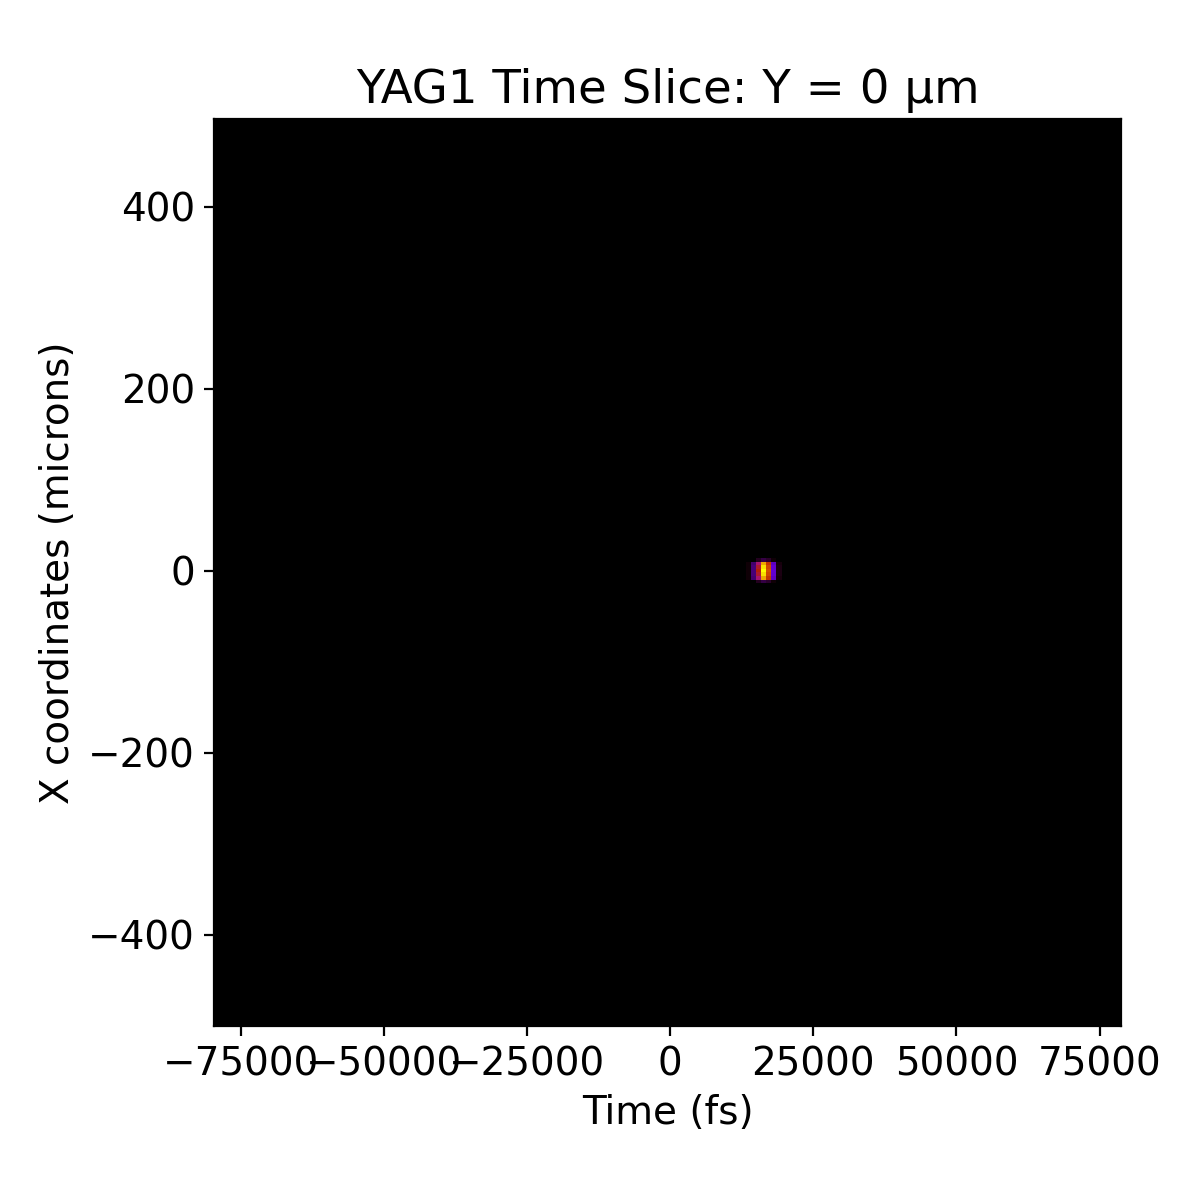

128


<IPython.core.display.Javascript object>


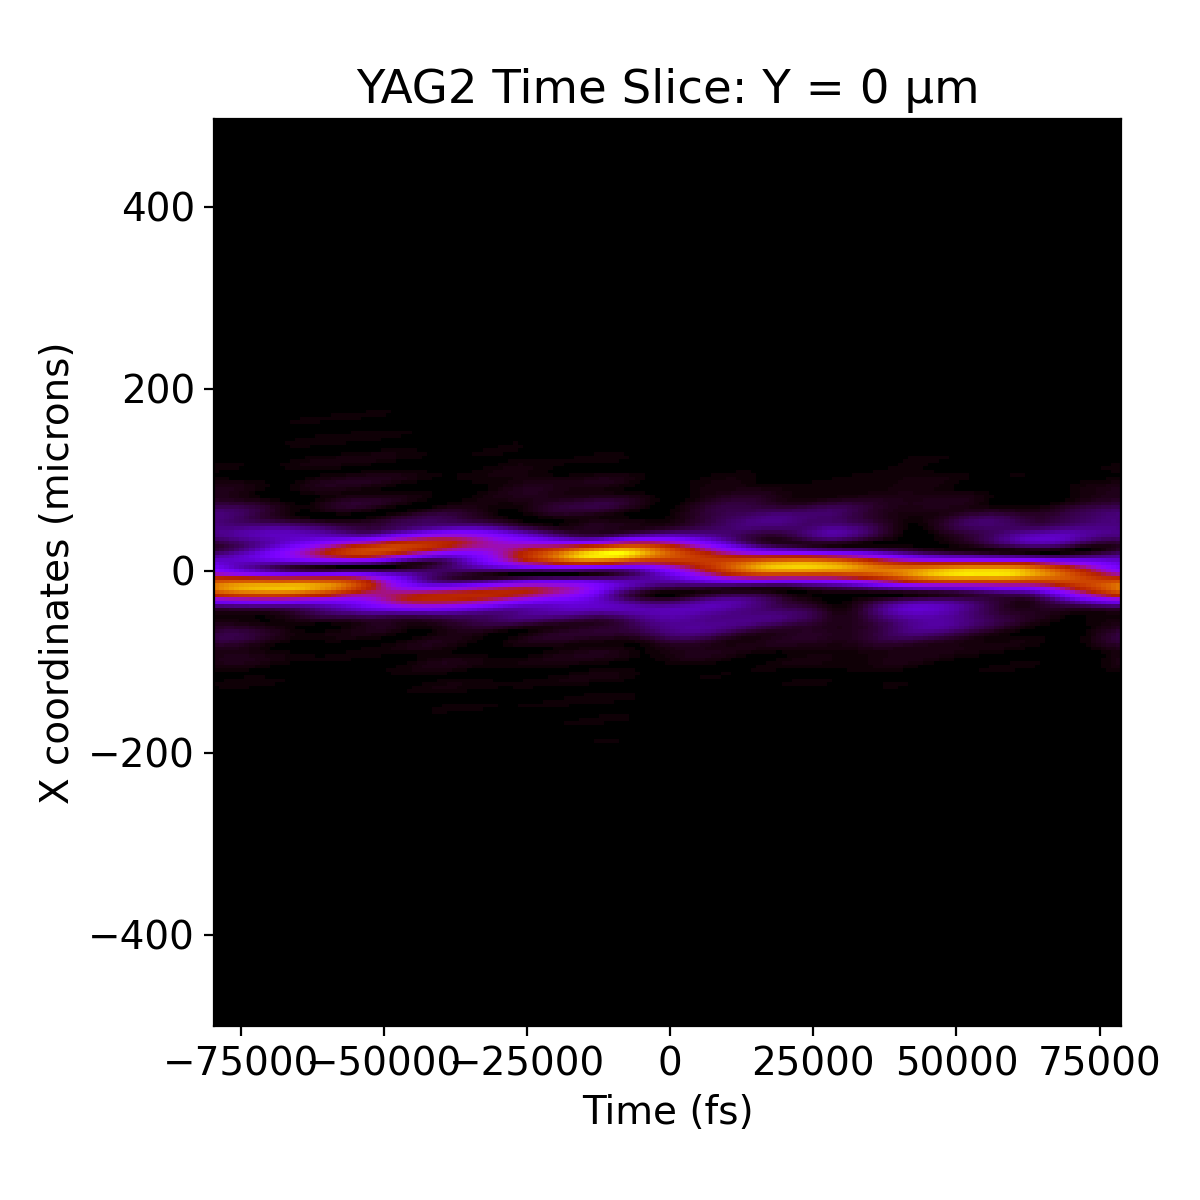

128


/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:977: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>


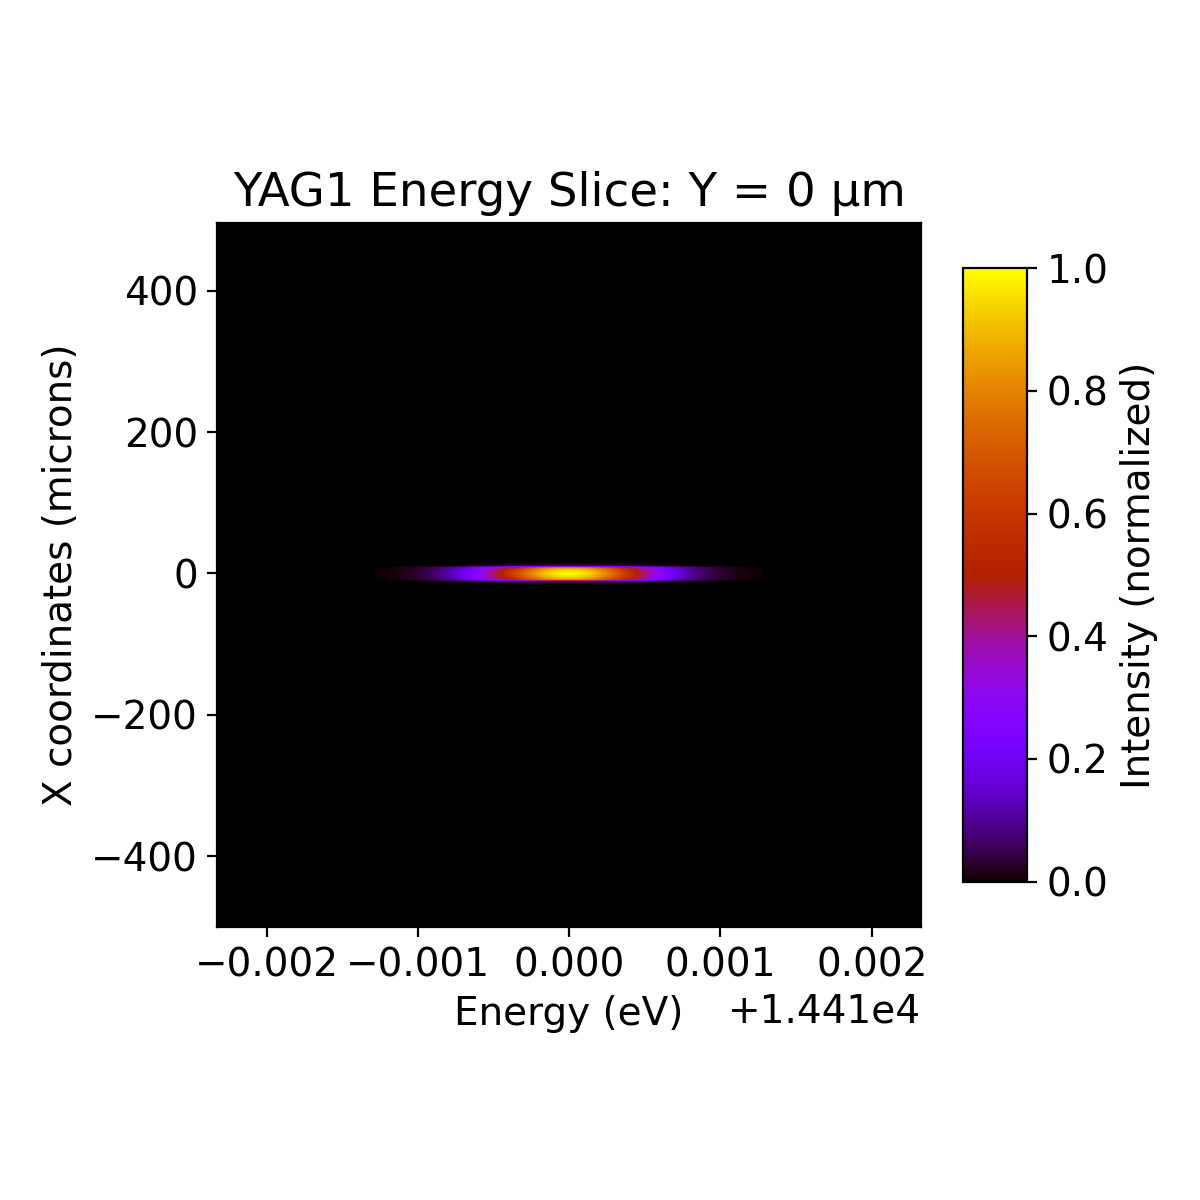

<IPython.core.display.Javascript object>


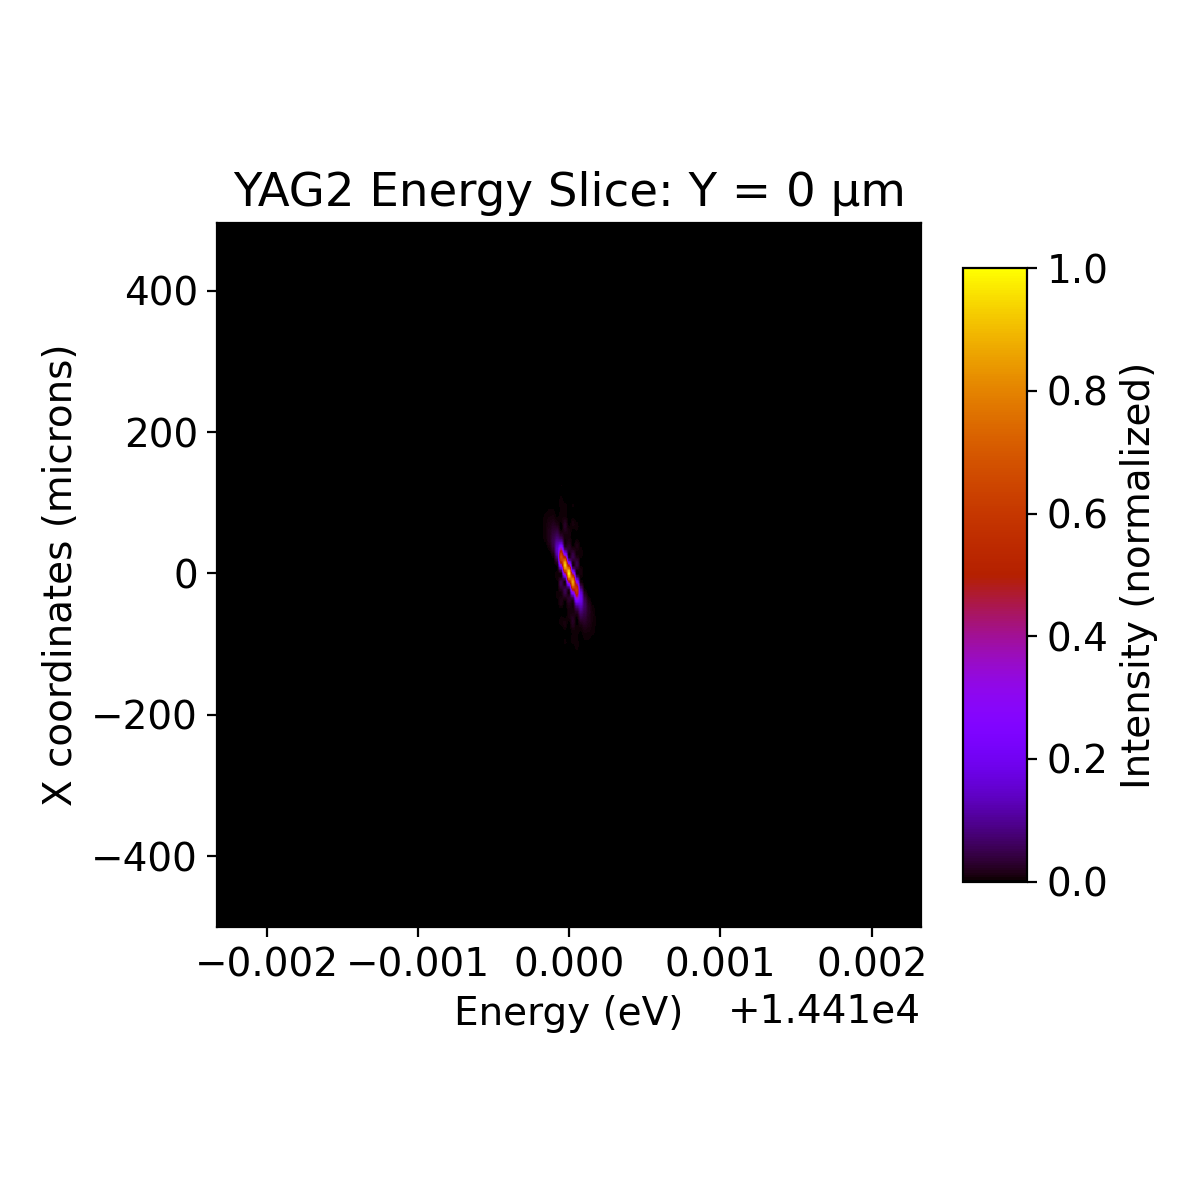

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1230: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


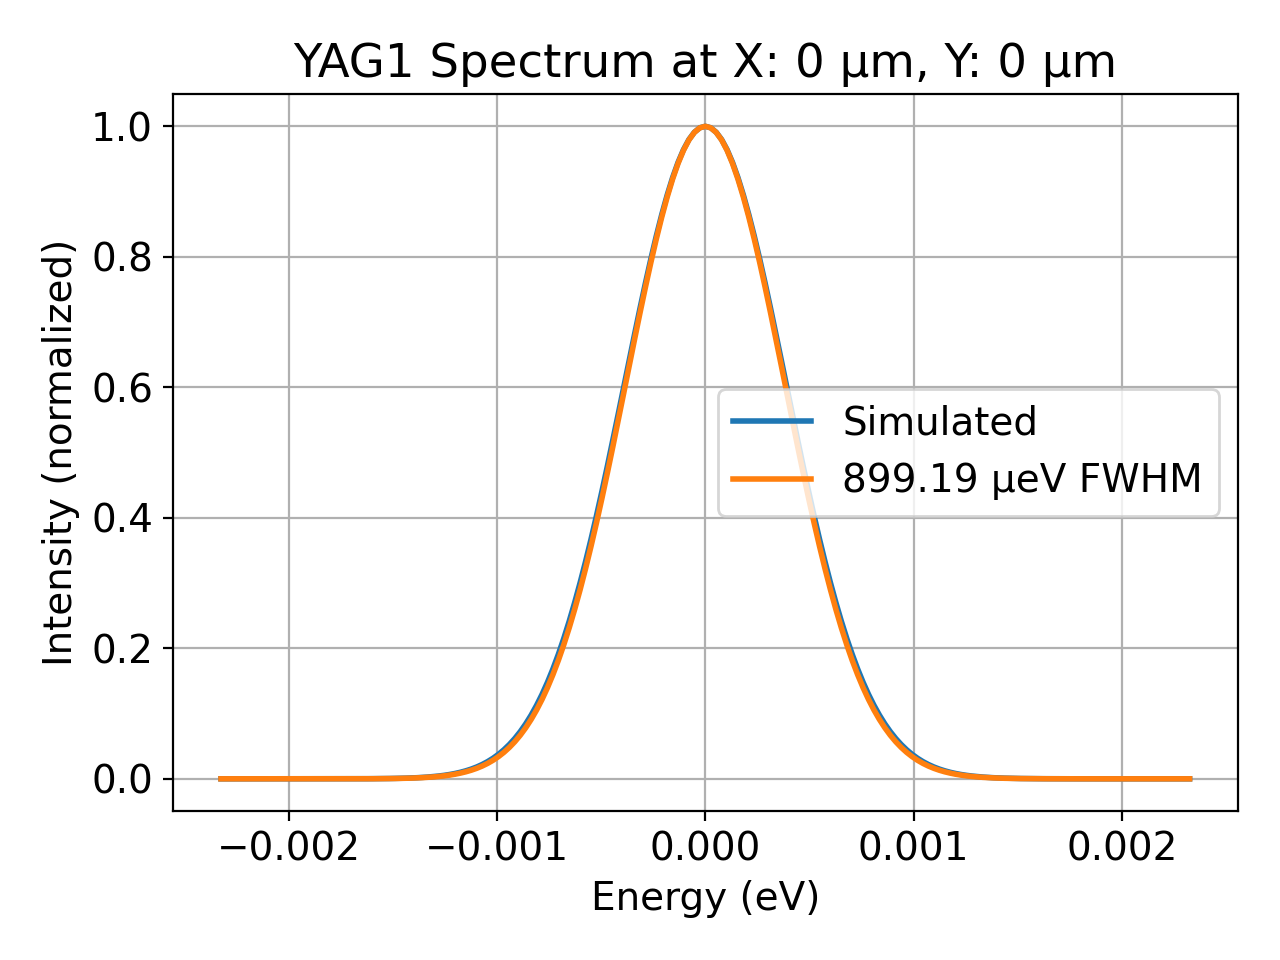

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1230: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


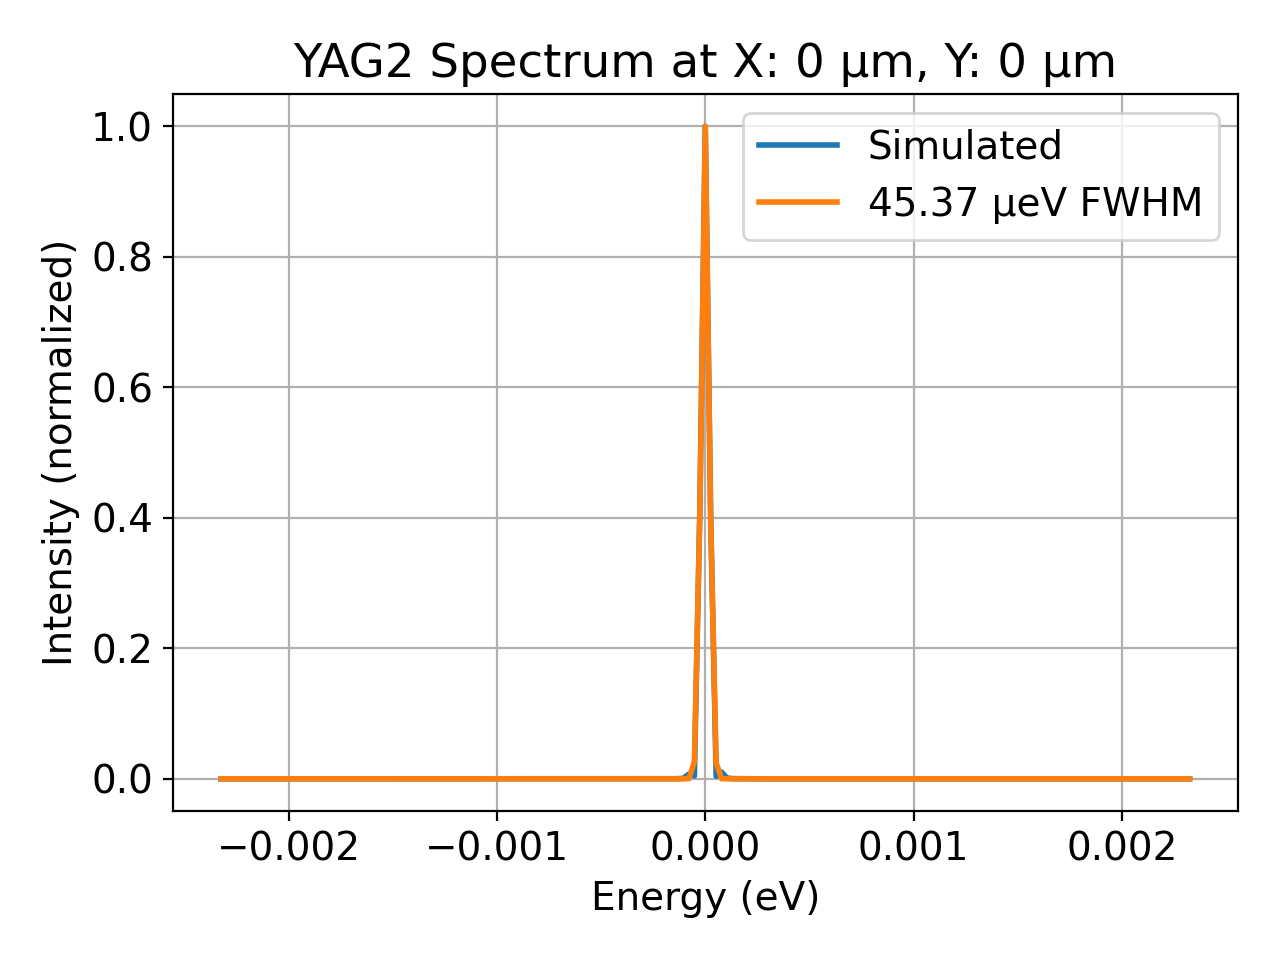

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1285: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


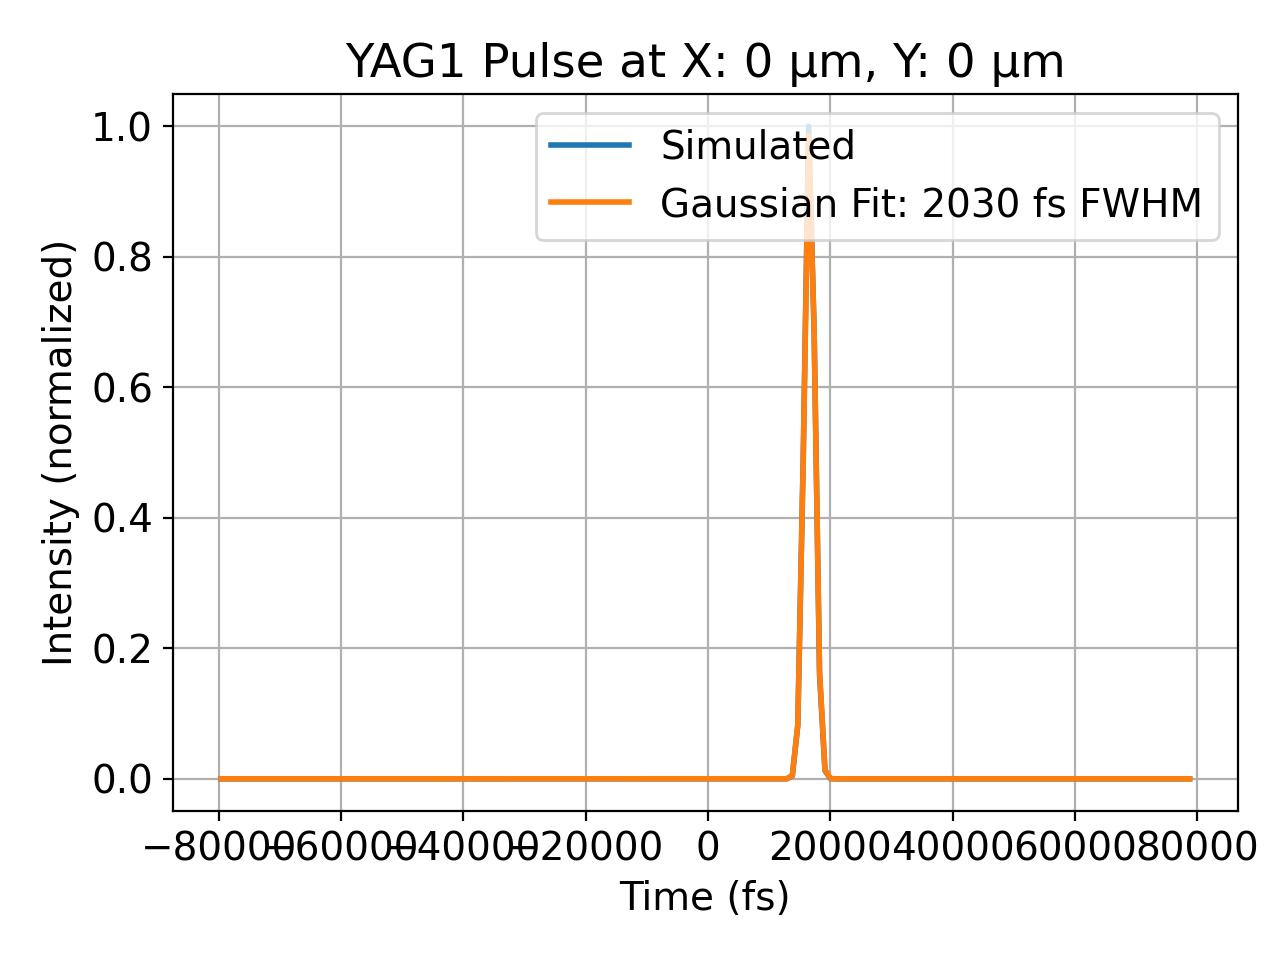

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1285: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


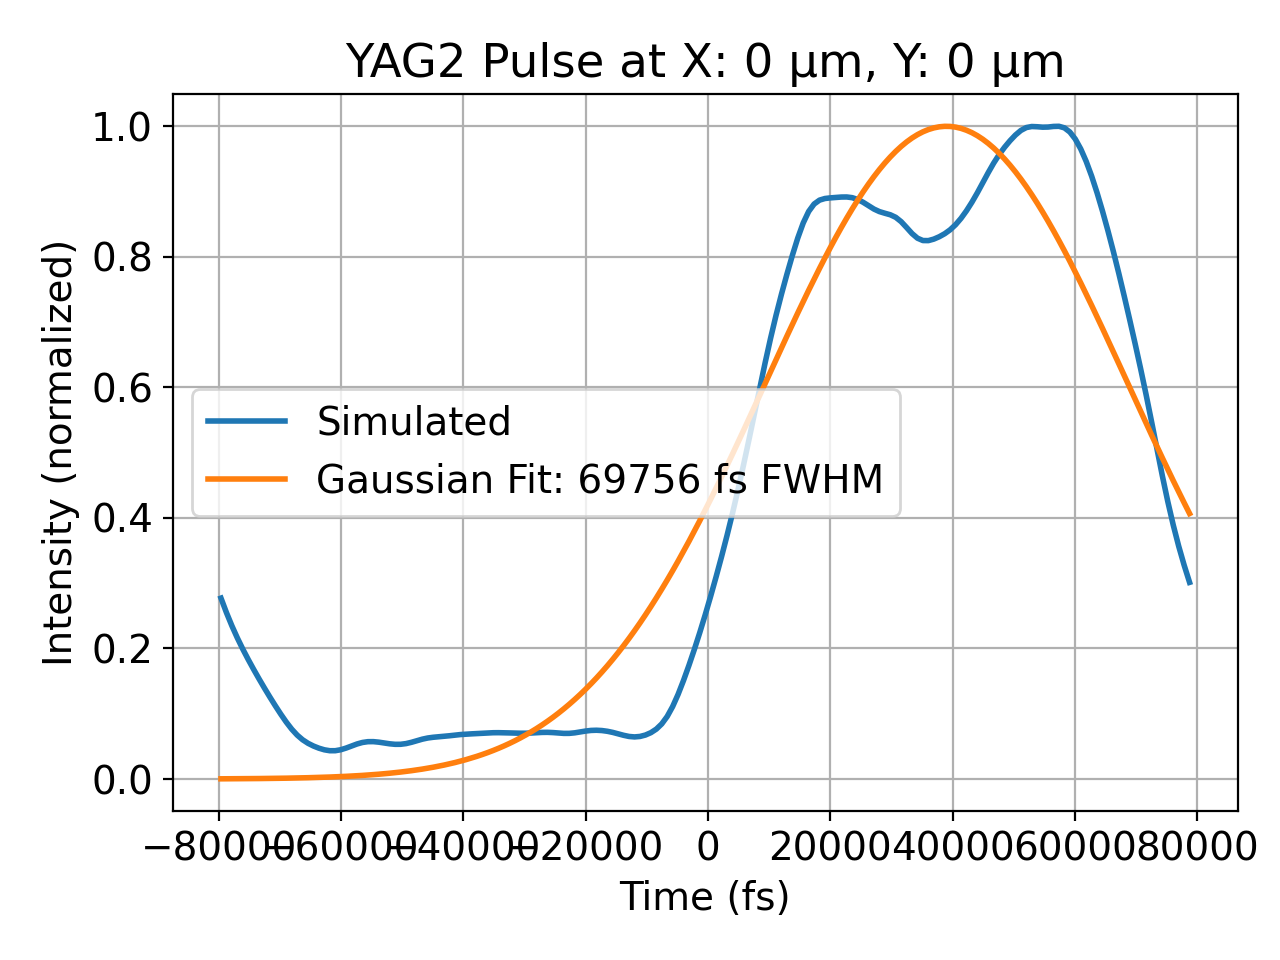

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:927: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


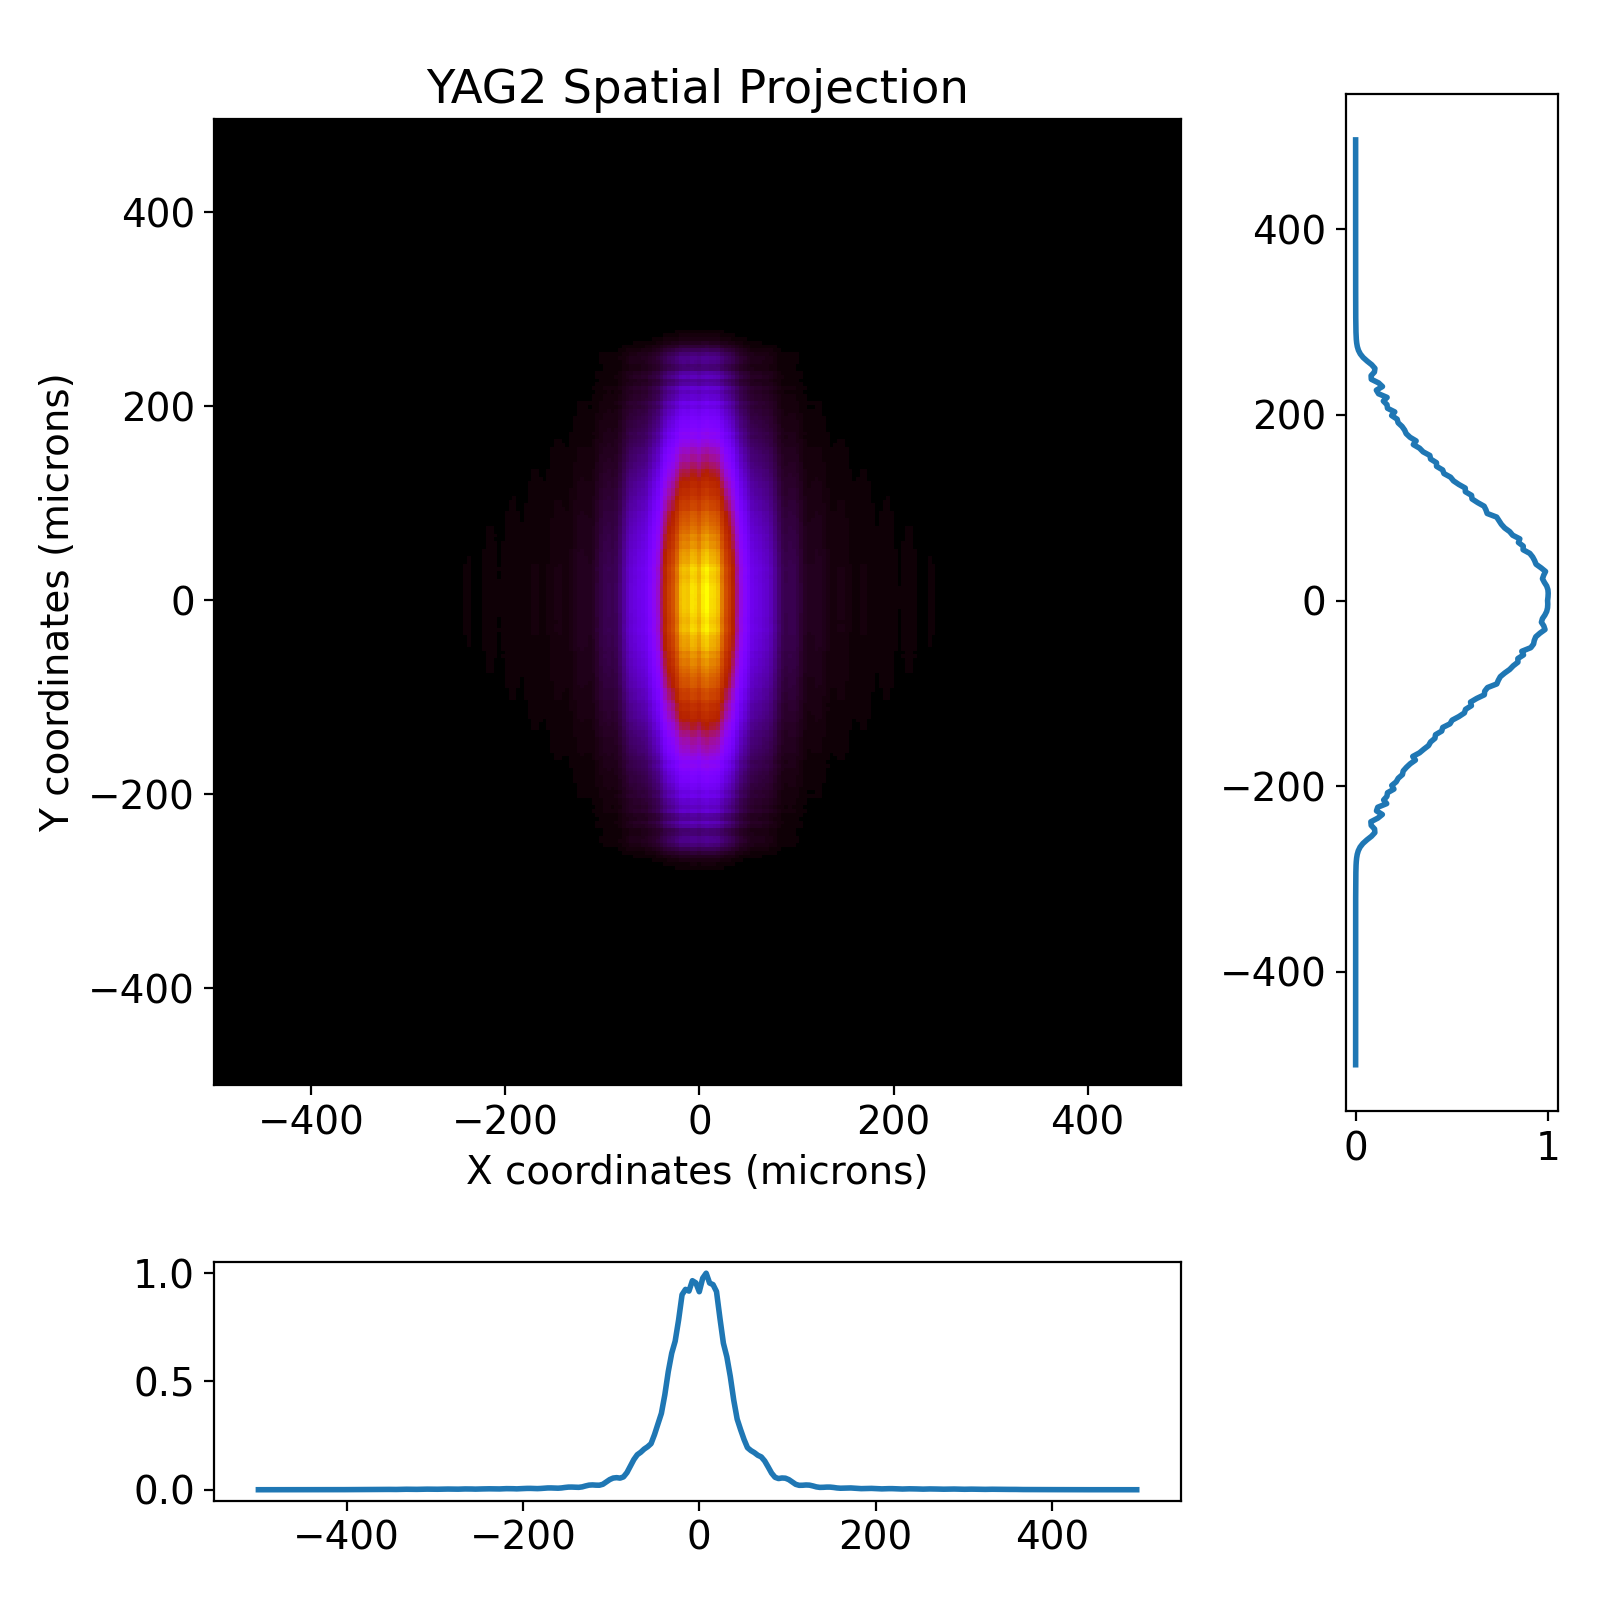

In [79]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2',x_pos=0)
pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
# pulse_test.imshow_energy_slice('IP')
pulse_test.imshow_projection('YAG2')
# pulse_test.imshow_time_slice('IP')

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


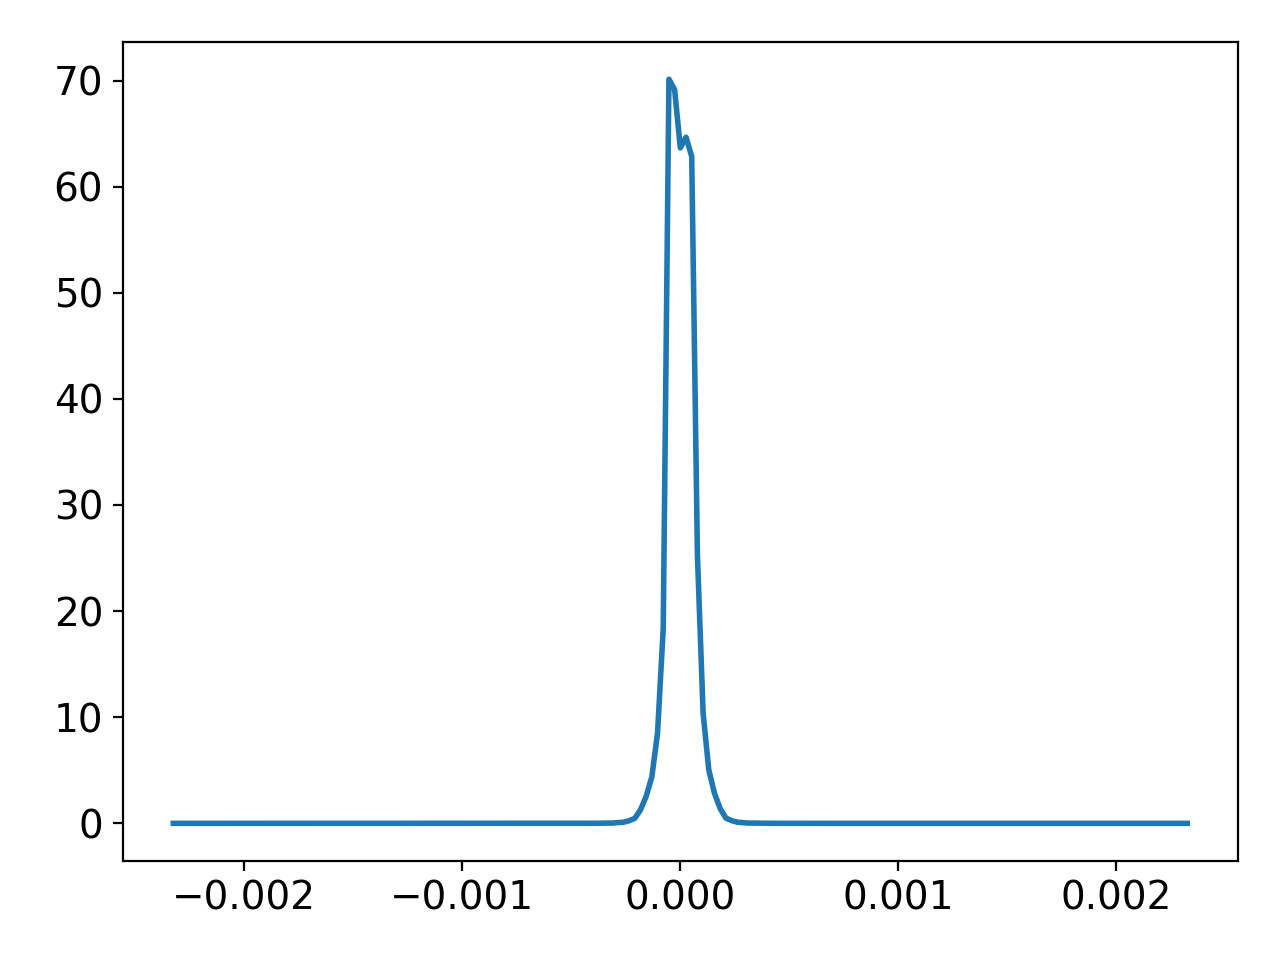

In [80]:
y_data = np.sum(np.abs(pulse_test.energy_stacks['YAG2'][128,:,:]),axis=0)**2
plt.figure()
plt.plot(pulse_test.energy-14410,y_data)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8